## 📈 Project Overview: Optimizing Sales Strategies

This project, part of a Data Analyst certification on DataCamp, focused on analyzing sales data for a company selling pens and printers. The objective was to identify the most effective sales strategy to **maximize revenue** and **optimize resource allocation**.

### 🔍 Goals
- Analyze performance of different sales strategies: **Email**, **Call**, and **Email + Call**
- Understand **revenue trends** and **regional sales patterns**
- Define a clear **business metric** to track performance
- Deliver **data-driven recommendations** to improve future sales and marketing efforts

### 📌 Key Insights
- **Email** accounted for 50% of total revenue, followed by **Call (33%)**, and **Email + Call (17%)**
- **Top 7 states** (including California, Texas, and New York) generated **67% of total revenue**
- The most effective metric identified: **Revenue per Customer** per strategy

### ✅ Recommendations
- **Expand** the *Email + Call* strategy for high-value customers
- **Optimize** Email-only campaigns with better content, timing, and personalization
- **Focus** on high-performing states with targeted marketing
- **Develop** new strategies for underperforming regions
- **Reduce** reliance on Call-only outreach
- **Track** revenue per customer regularly to refine strategies over time


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("viridis")

In [2]:
df = pd.read_csv('product_sales.csv')

df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# Data Validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
df.week.value_counts(dropna=False)

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

## Analysing `sales_method`

In [5]:
df.sales_method.value_counts(dropna=False)

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

Below we are fixing issue with the sales method column by replacing incorrect values.

In [6]:
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [7]:
df.customer_id.nunique()

15000

In [8]:
df.nb_sold.value_counts(dropna=False)

10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: nb_sold, dtype: int64

## Analysing `revenue`

In [9]:
df.revenue.describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

In [10]:
df.revenue.isna().sum()

1074

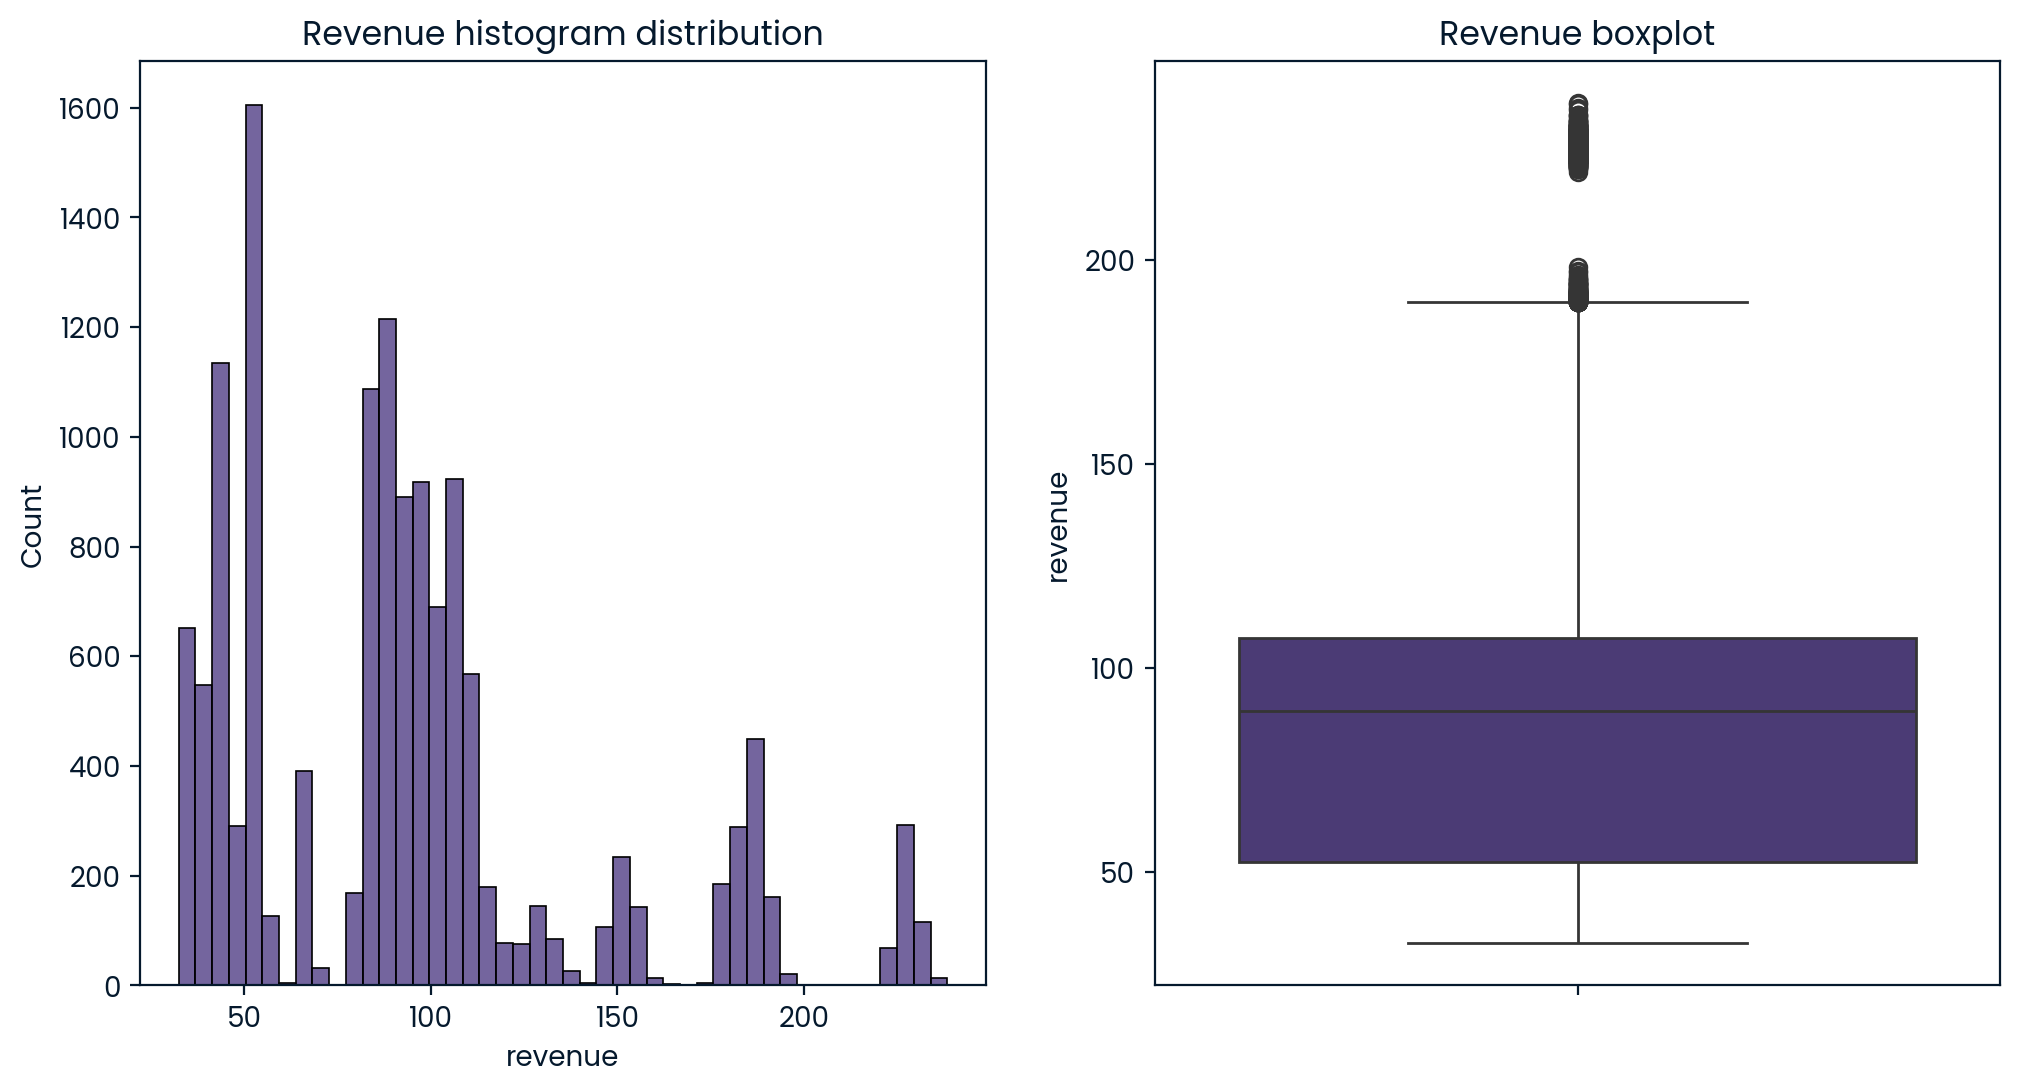

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.histplot(data=df, x='revenue', ax=ax[0])
ax[0].set_title('Revenue histogram distribution')

sns.boxplot(data=df, y='revenue', ax=ax[1])
ax[1].set_title('Revenue boxplot')
plt.show()

The revenue historgram shows slight right skewness. Best approach would be median imputation for managing missing values.

In [12]:
df.revenue.fillna(df.revenue.median(), inplace=True)

In [13]:
# Outlier correction for revenue

Q1 = df.revenue.quantile(0.25)
Q3 = df.revenue.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [14]:
upper_bound

185.61499999999998

In [15]:
df[df.revenue > upper_bound]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
34,5,Email + Call,4a7ca51d-34c7-4fd2-a90f-c9104b636269,13,190.39,8,26,Illinois
50,5,Email + Call,6c62ab37-84d9-40ac-af7e-572bc906de64,13,188.87,0,26,Texas
82,6,Email + Call,9a39d6f6-ef55-4812-ad9d-0016d6285ff7,15,229.36,3,29,Georgia
93,5,Email + Call,cf11385c-a004-45b2-ba8f-3003c32184d5,12,186.27,3,22,Michigan
...,...,...,...,...,...,...,...,...
14932,5,Email + Call,6683e3fc-138d-43a4-9d36-e2d56c0c9f5a,13,188.53,0,24,Wisconsin
14934,5,Email + Call,d02ca775-9288-4d86-838d-6b69c2fe6e1b,13,191.93,2,27,Utah
14955,6,Email + Call,3b701abb-e1b5-498e-80a2-b0056ddd611e,15,225.37,2,29,Colorado
14969,5,Email + Call,79f87427-1858-423b-82d2-81678adeabbd,12,185.62,8,33,New York


In [16]:
df[df.revenue > upper_bound].shape

(1031, 8)

### Handling Revenue Outliers  

One approach to handling the `revenue` column is adjusting for outliers. However, upon analyzing the data, we observed that **1,031 customers fall above the upper bound of $185**, indicating that high revenue is fairly common.  

A key observation is that **these customers consistently purchase more than 10 items**, which explains the higher revenue. This suggests that their purchasing behavior is legitimate rather than anomalous.  

Interestingly, all these high-revenue customers were part of the **Email + Call marketing strategy**. This insight highlights a strong opportunity to optimize and expand this marketing approach for even better results.  

### **Final Decision:**  
We will **retain the `revenue` column as is** after **imputing missing values with the median**.  


## Analysing `years_as_customer`

In [17]:
df.years_as_customer.describe()

count    15000.000000
mean         4.965933
std          5.044952
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

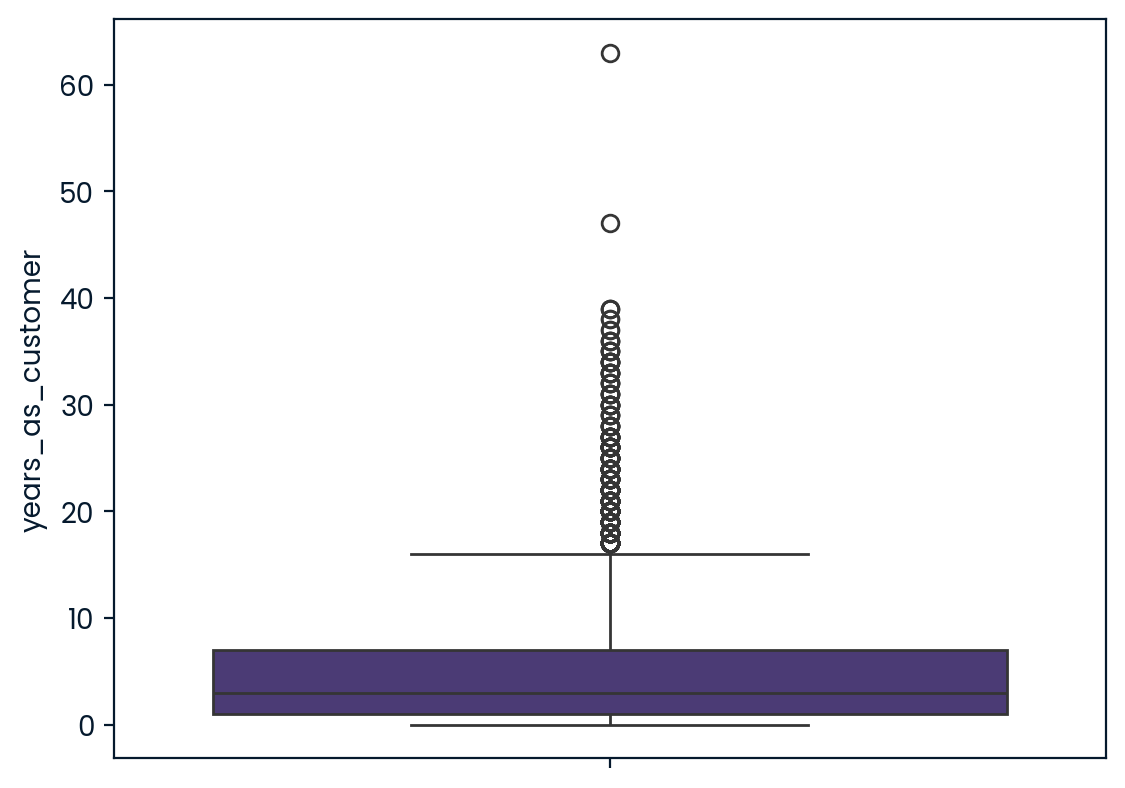

In [18]:
sns.boxplot(data=df, y='years_as_customer')
plt.show()

In [19]:
# Outlier correction for years as customers

Q1 = df.years_as_customer.quantile(0.25)
Q3 = df.years_as_customer.quantile(0.75)

IQR = Q3 - Q1

lower_bound_yac = Q1 - 1.5 * IQR
upper_bound_yac = Q3 + 1.5 * IQR


In [20]:
upper_bound_yac

16.0

In [21]:
df[df.years_as_customer > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [22]:
# Capping years_as_customer at 40 years
df['years_as_customer'] = df['years_as_customer'].clip(upper=41)

### **Handling `years_as_customer` Column**  

The boxplot analysis suggests an upper bound of **16 years**, but considering the company was founded in **1984**, the maximum possible customer tenure in **2025 is 41 years**.  

Instead of strictly following statistical outlier limits, we take a **real-world approach**:  
- Some customers may have been with the company for **decades**, and their presence is **not an anomaly but a sign of loyalty**.  
- Just as we treated high-revenue customers as valid, we apply the same logic here.  
- Business-driven analysis should **align with reality, not just statistical thresholds**.  

### **Final Decision:**  
We will **cap `years_as_customer` at 41 years**, ensuring a balance between **data integrity and real-world validity**.  


## Analysing `nb_site_visits`

In [23]:
df.nb_site_visits.describe()

count    15000.000000
mean        24.990867
std          3.500914
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         41.000000
Name: nb_site_visits, dtype: float64

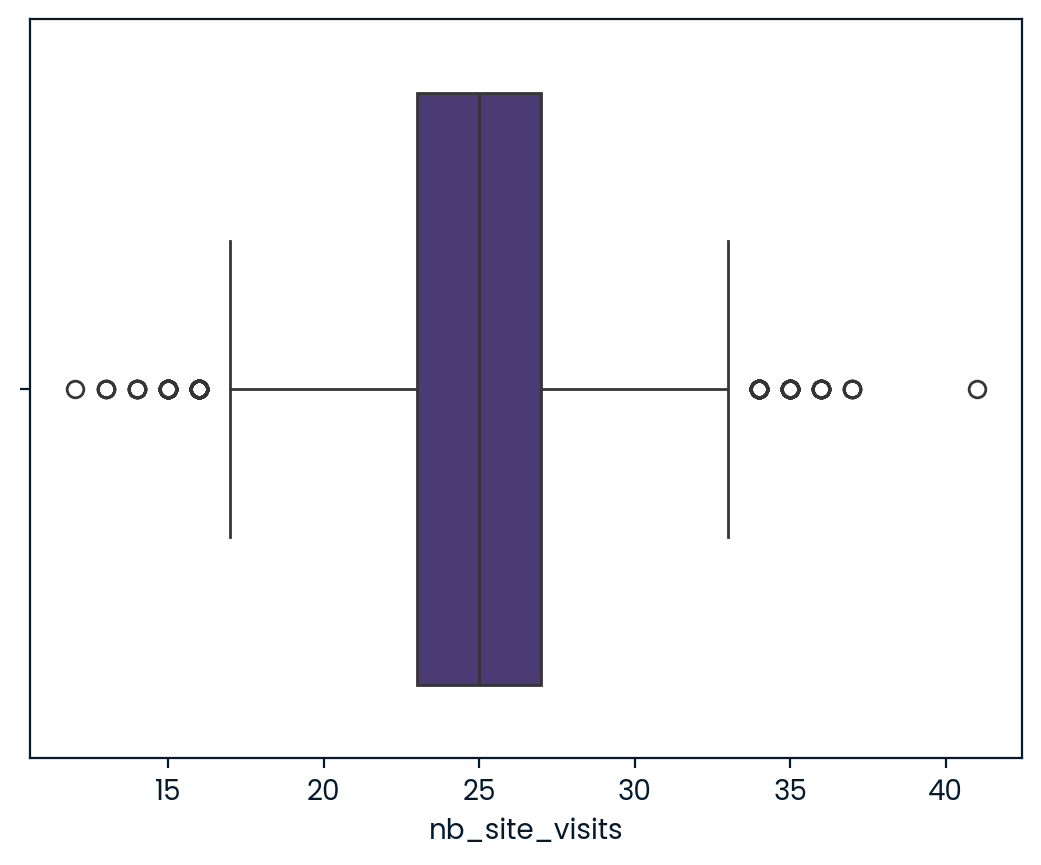

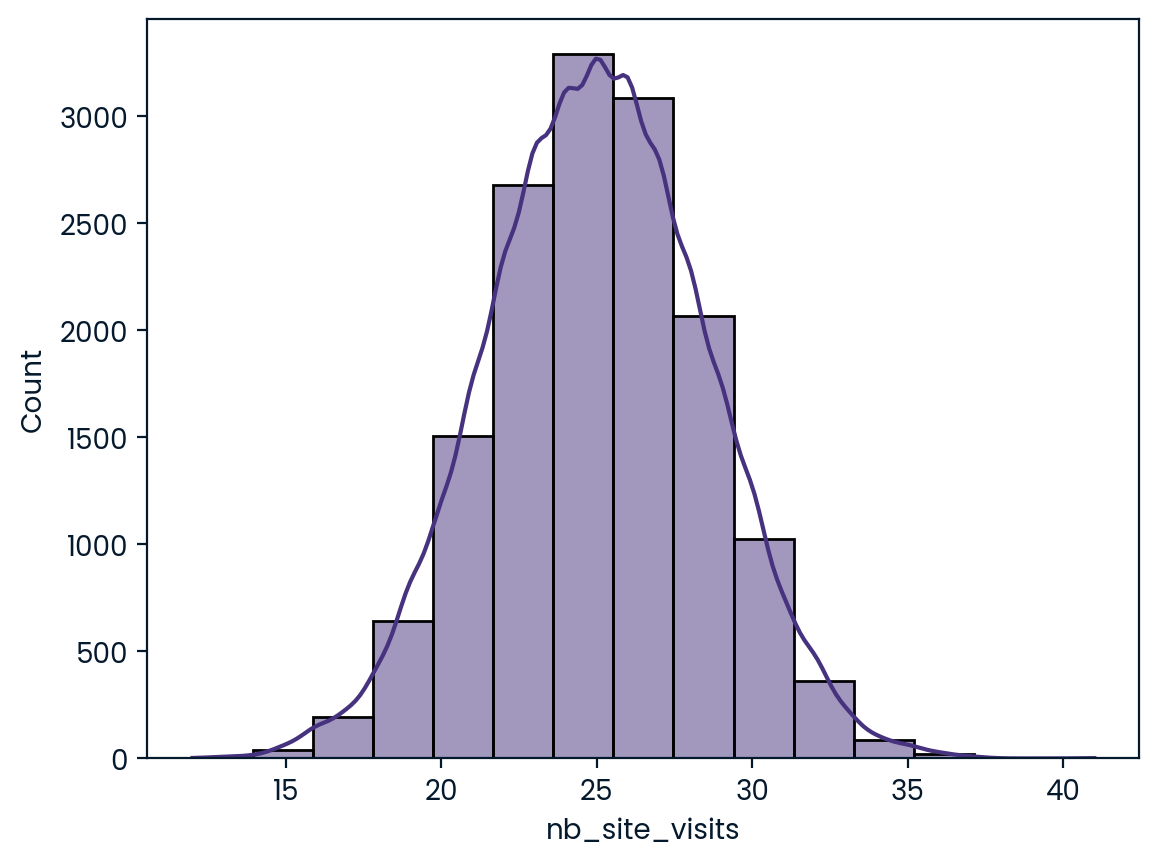

In [24]:
sns.boxplot(x=df['nb_site_visits'])
plt.show()

sns.histplot(df['nb_site_visits'], bins=15, kde=True)
plt.show()


In [25]:
df.groupby('sales_method')['nb_site_visits'].describe()


,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4962.0,24.423821,3.599864,12.0,22.0,24.0,27.0,41.0
Email,7466.0,24.754353,3.281552,13.0,23.0,25.0,27.0,37.0
Email + Call,2572.0,26.771384,3.357916,14.0,25.0,27.0,29.0,37.0


In [26]:
# Calculate IQR
Q1 = df['nb_site_visits'].quantile(0.25)
Q3 = df['nb_site_visits'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound_site = Q1 - 1.5 * IQR
upper_bound_site = Q3 + 1.5 * IQR

In [27]:
lower_bound_site, upper_bound_site

(17.0, 33.0)

In [28]:
df[(df.nb_site_visits < lower_bound_site) | (df.nb_site_visits > upper_bound_site)].sort_values(by='nb_site_visits')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
8790,3,Call,1c443c17-e8df-4164-9350-9498bbc838db,8,40.95,0,12,Pennsylvania
12575,1,Call,455a8d33-8fdb-4fbe-94d1-dff0095574c9,7,33.18,10,13,Arizona
9092,3,Call,7dcd49cd-174a-4c15-bb5f-67f631b6d5e6,8,40.28,9,13,Florida
11312,3,Email,073e4557-8c28-4e11-931e-4fd67cc26584,10,95.72,1,13,Florida
7617,1,Call,e64d63b8-ed40-405d-a3a3-98c171118bf6,7,36.14,3,13,Texas
...,...,...,...,...,...,...,...,...
7908,6,Email + Call,005b4131-873d-4c37-9052-7756171715f3,15,229.07,1,37,Colorado
611,6,Email,b3c5e345-2901-42b5-8252-8b402d1a60f9,14,89.50,2,37,Utah
14727,6,Call,14f5217b-7b5d-47b8-93bb-88a696f8b23f,13,66.20,5,37,Florida
3183,6,Email + Call,0cb21a71-43ed-4fa0-b33d-577cfebcd2c6,15,227.03,1,37,Pennsylvania


### **Handling Outliers in `nb_site_visits`**  

`nb_site_visits` follows a **normal distribution**, with a few extreme values. A single customer had **41 visits**, making it an anomaly rather than a trend.  

### **Final Decision**  
We **won’t cap outliers**, as they don’t distort insights. This aligns with our approach for **revenue** (high values reflect bulk purchases) and **years as customer** (capped at a logical max). Keeping data intact ensures business relevance.


## Analysing `state`

In [29]:
df.state.value_counts(dropna=False)

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [30]:
df.state.nunique()

50

In [31]:
df.state.isna().sum()

0

No changes required for `state` column. No missing values. 50 unique states.

## **Overview of Steps Taken for Data Validation**  

- **week**: No changes.  
- **sales_method**: Standardized minor variations to fit within our three ideal categories.  
- **customer_id**: No changes.  
- **nb_sold**: No changes.  
- **revenue**: ~7% missing values imputed using the **median**. Kept high values as they reflect bulk purchases.  
- **years_as_customer**: Adjusted upper bound to **41 years** (realistic max based on company founding year).  
- **nb_site_visits**: Identified outliers but **did not cap**, as they follow a normal distribution and anomalies are rare.  
- **state**: No changes.  


# Exploratory Data Analysis

Count plot for Sales by different marketing methods

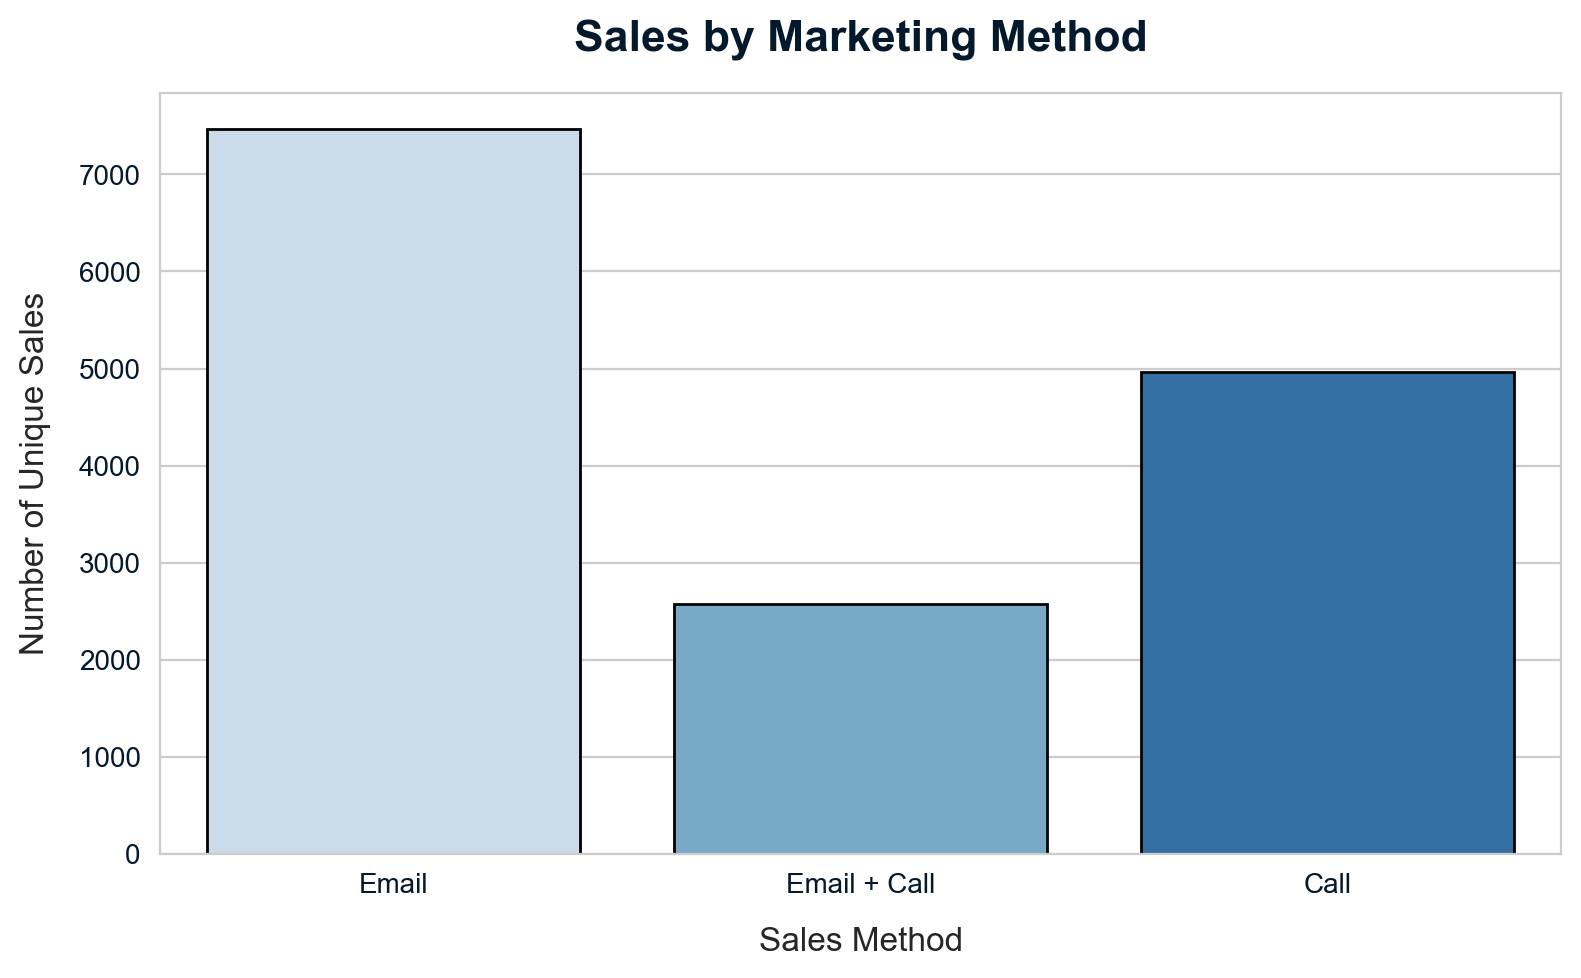

In [32]:
plt.figure(figsize=(8, 5))  
sns.set_style("whitegrid")

ax = sns.countplot(x=df["sales_method"], palette="Blues", edgecolor="black")

plt.xlabel("Sales Method", fontsize=12, labelpad=10)
plt.ylabel("Number of Unique Sales", fontsize=12, labelpad=10)
plt.title("Sales by Marketing Method", fontsize=16, fontweight="bold", pad=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [33]:
df.sales_method.value_counts(normalize=True).mul(100).round()

Email           50.0
Call            33.0
Email + Call    17.0
Name: sales_method, dtype: float64

## Sales Method Performance Across Top 15 Revenue-Contributing States

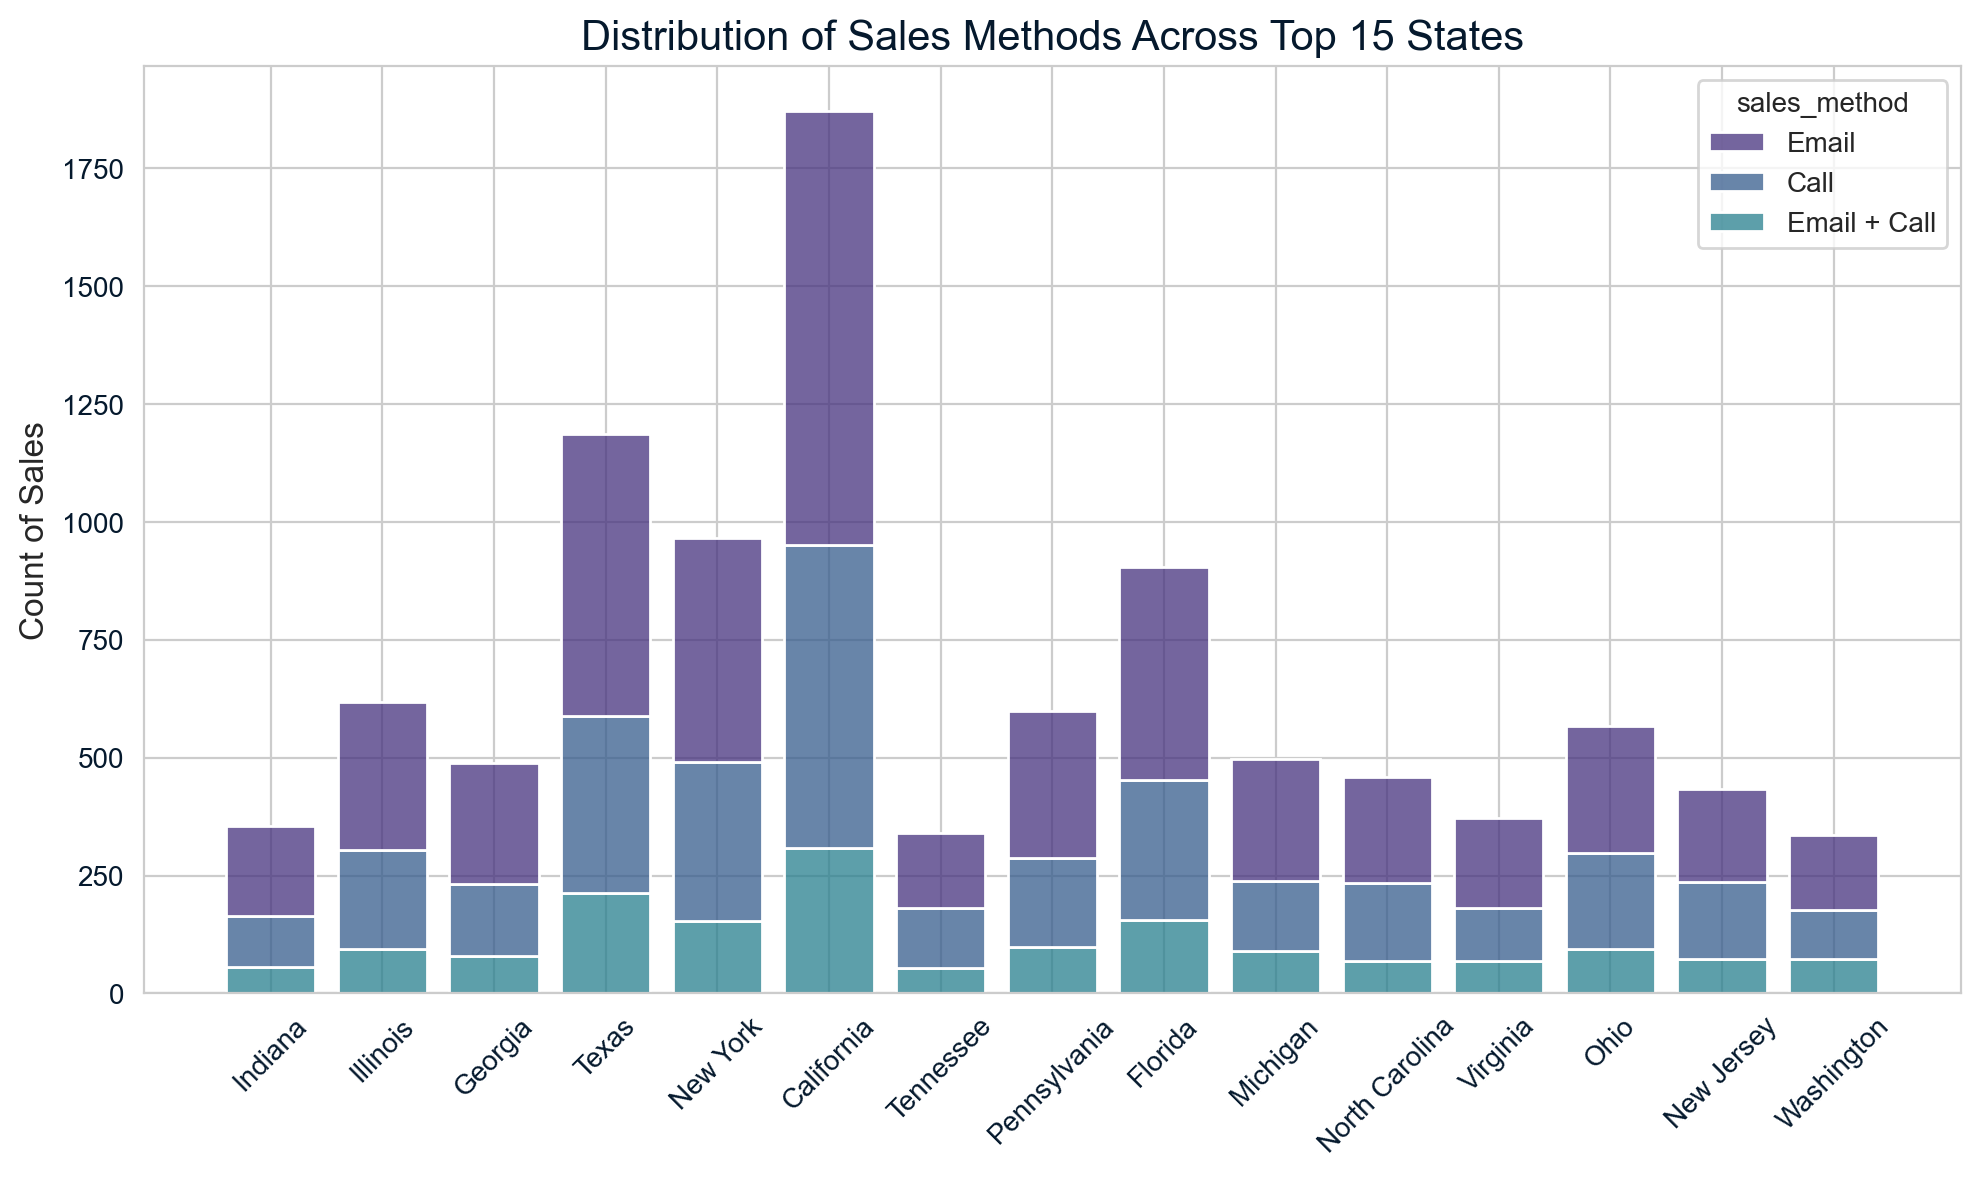

In [34]:
top_states = df.state.value_counts().index[:15]

df_filtered = df[df.state.isin(top_states)]

plt.figure(figsize=(10,6))
sns.histplot(data=df_filtered, x='state', hue='sales_method', multiple='stack', shrink=0.8)
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Distribution of Sales Methods Across Top 15 States', fontsize=15)
plt.ylabel('Count of Sales', fontsize=12)
plt.tight_layout()
plt.show()



## Top 15 States by Revenue Contribution

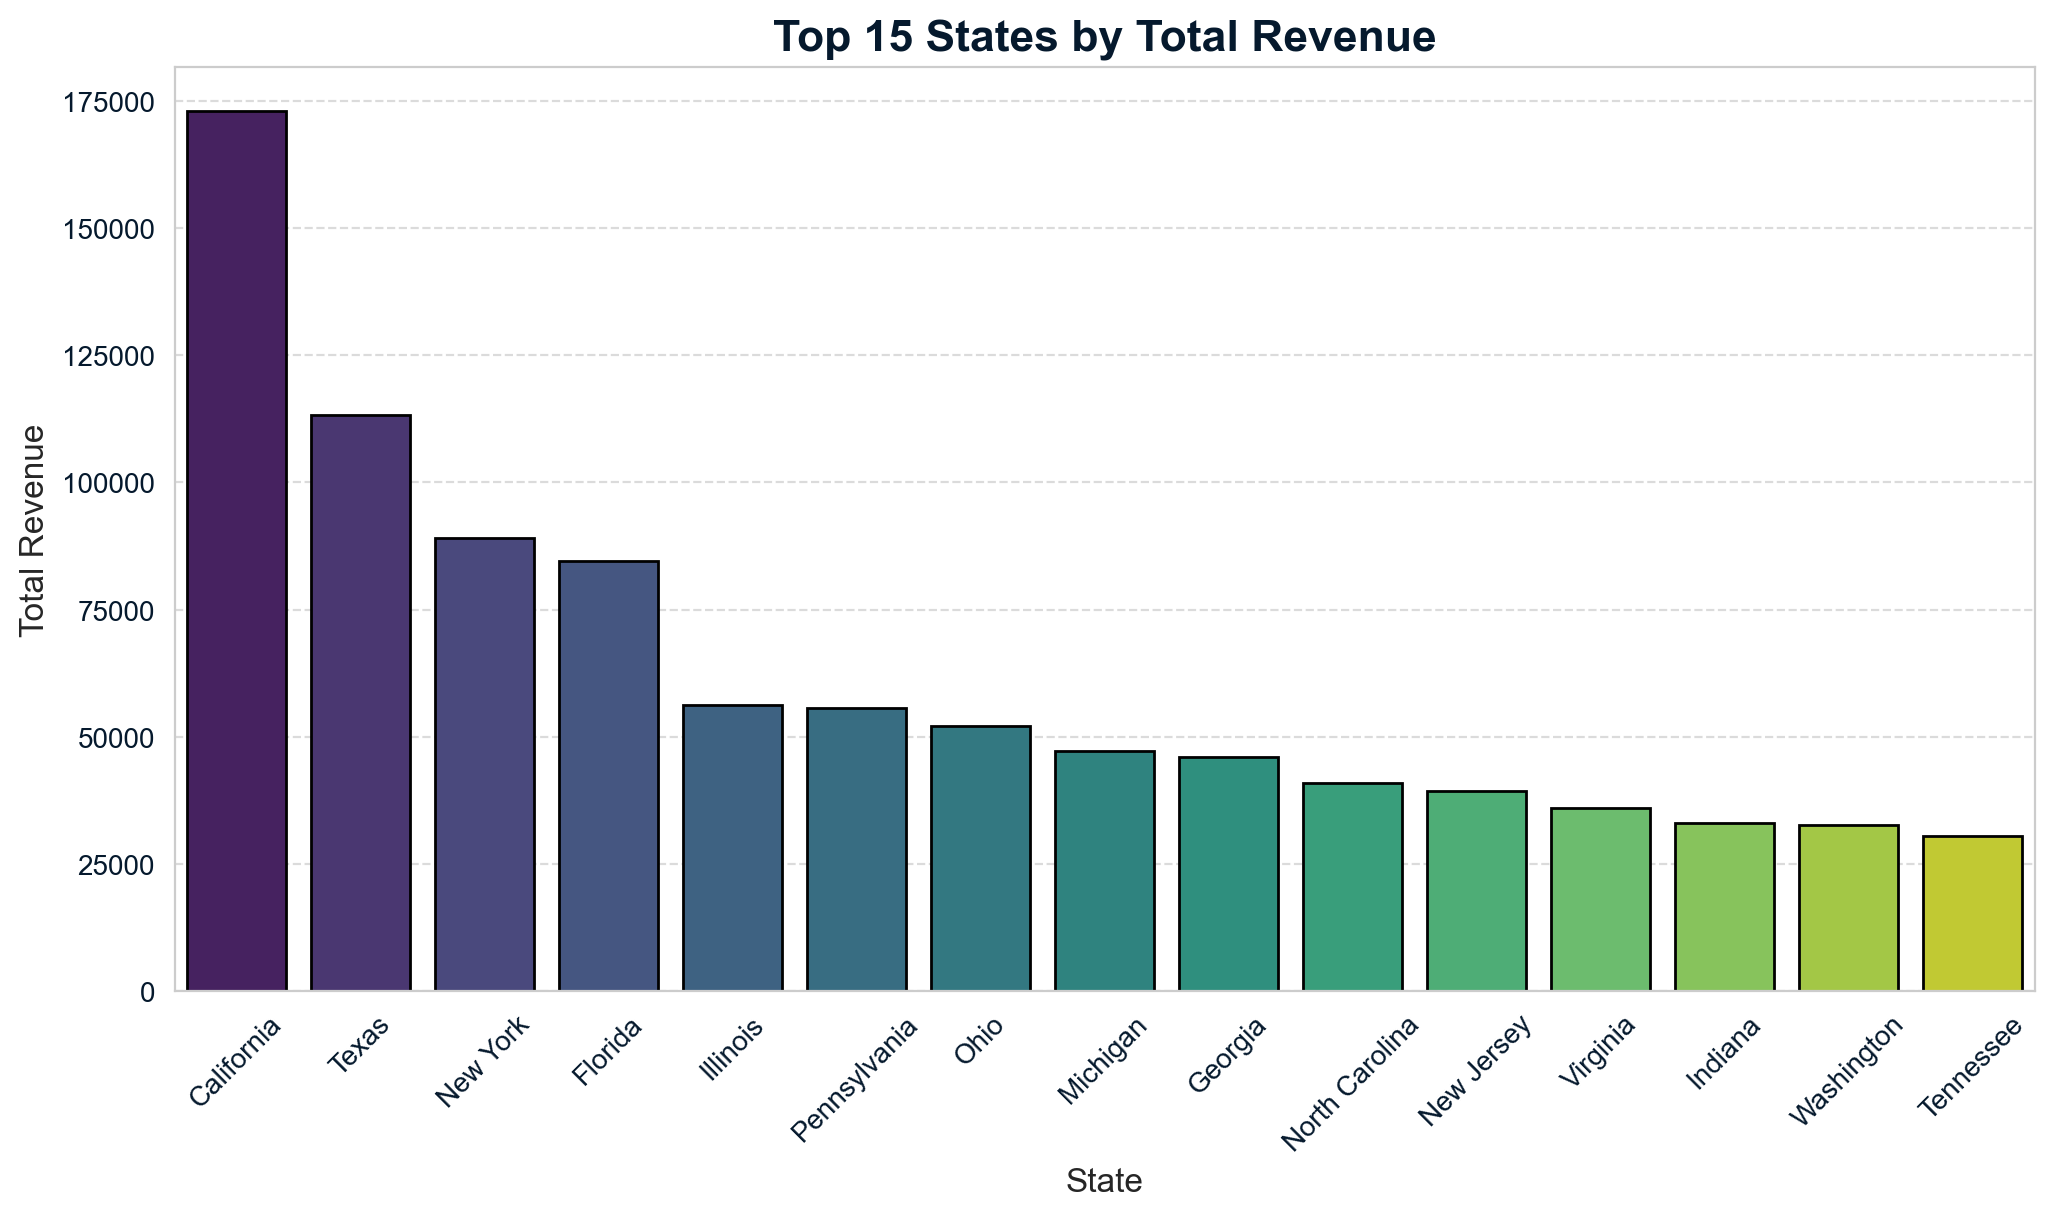

In [35]:
state_revenue = df.groupby("state")["revenue"].sum().round(2).reset_index()
state_revenue = state_revenue.sort_values(by="revenue", ascending=False).head(15)
state_revenue["revenue_pct"] = (state_revenue["revenue"] / state_revenue["revenue"].sum()).mul(100)
state_revenue['cum_revenue_perc'] = state_revenue.revenue_pct.cumsum().round(2)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_revenue, x="state", y="revenue", palette="viridis", edgecolor="black")
plt.title("Top 15 States by Total Revenue", fontsize=16, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [36]:
state_revenue.head(10)[['state','cum_revenue_perc']]

,state,cum_revenue_perc
4,California,18.59
42,Texas,30.77
31,New York,40.35
8,Florida,49.45
12,Illinois,55.51
37,Pennsylvania,61.49
34,Ohio,67.09
21,Michigan,72.17
9,Georgia,77.12
32,North Carolina,81.53


## Distribution of Revenue: Overall and by Sales Method

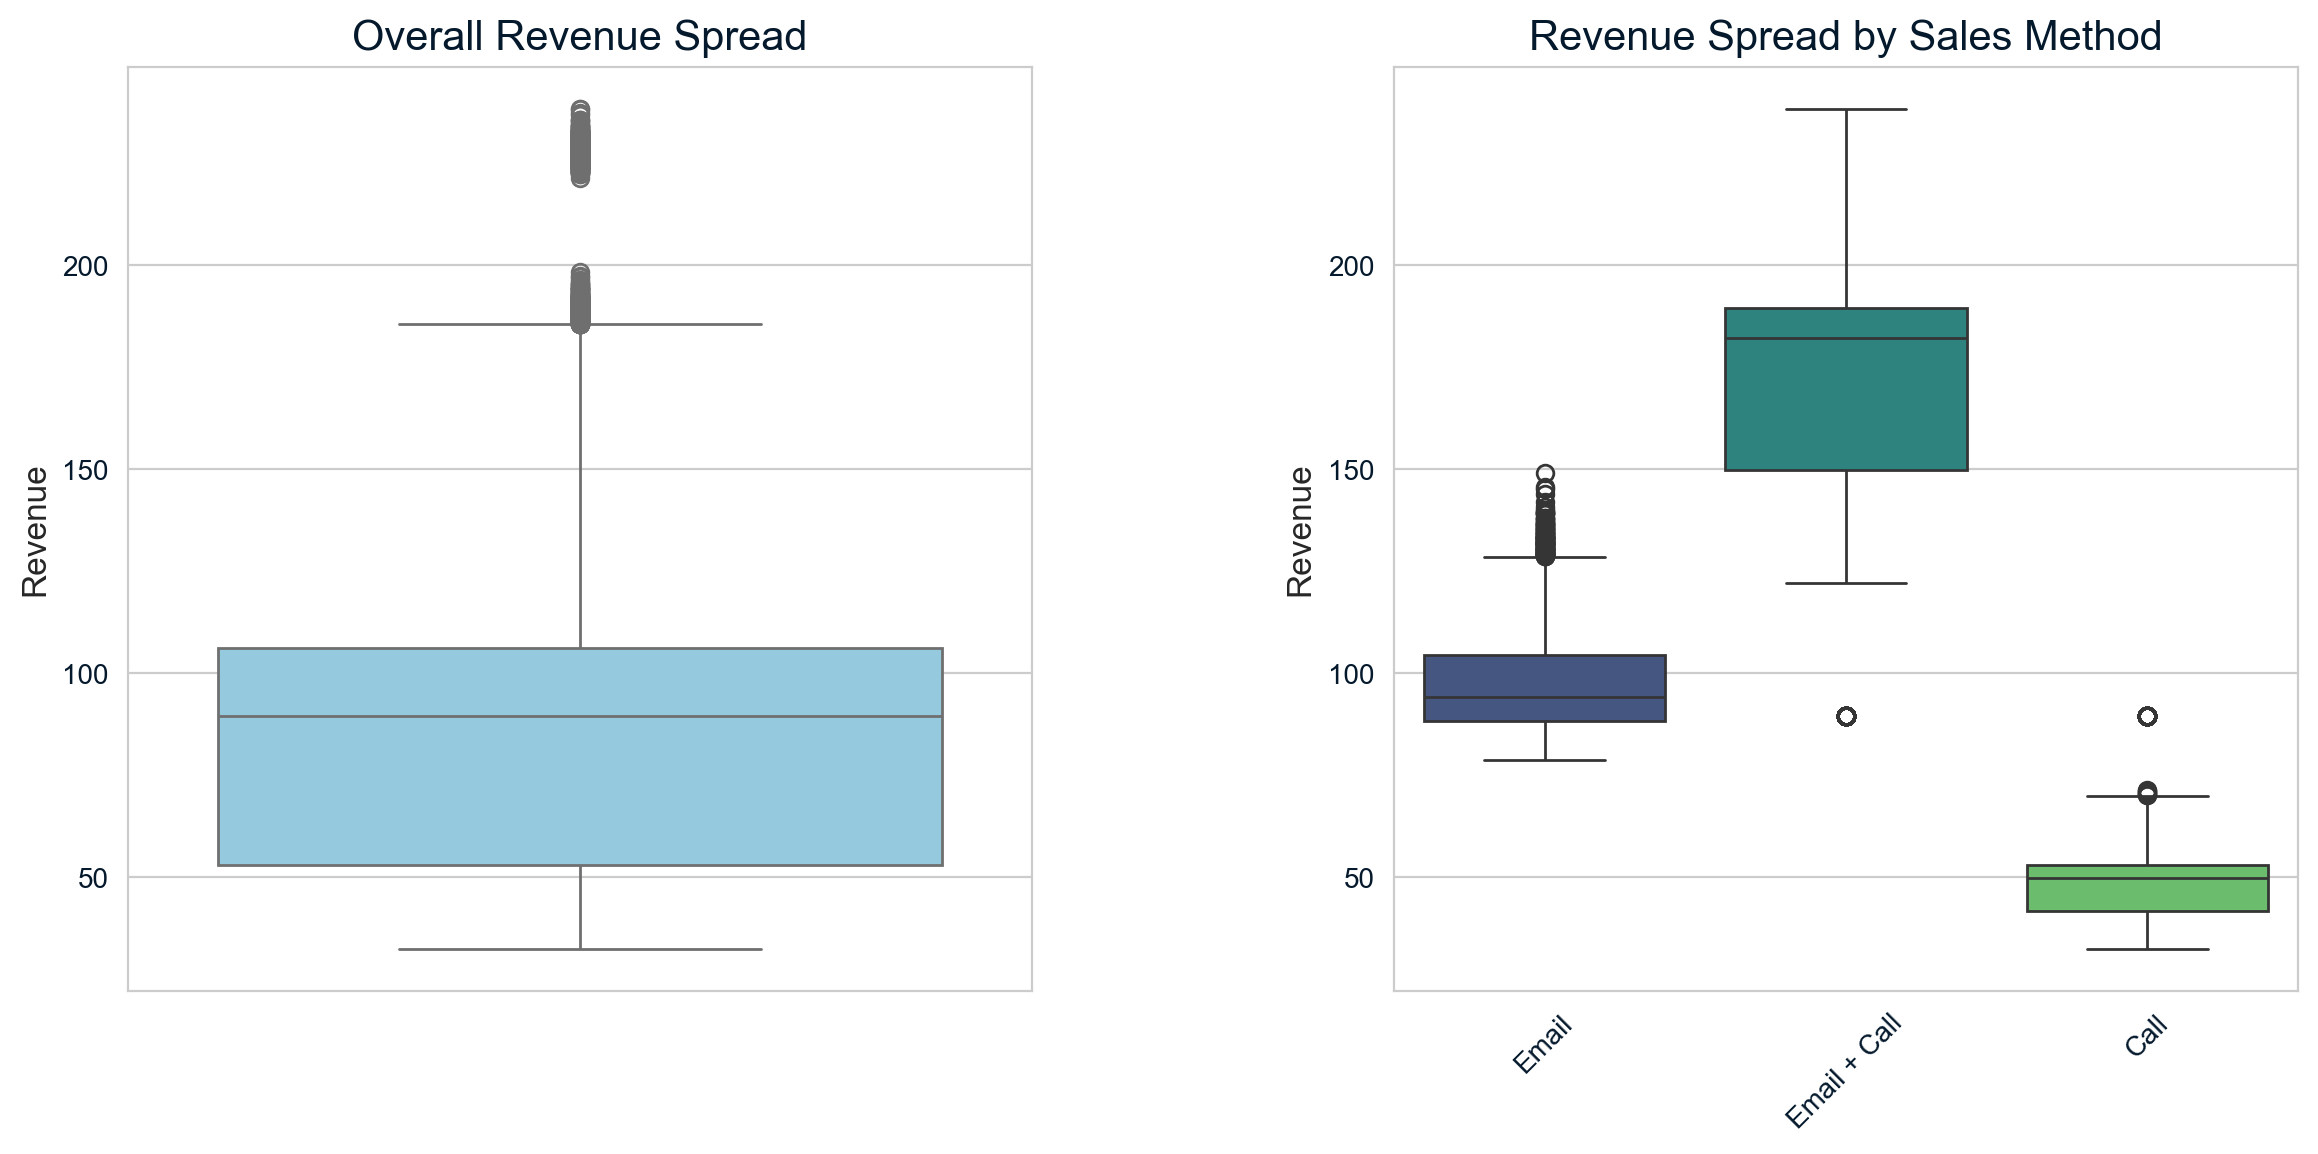

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, y="revenue", ax=axes[0], color="skyblue")
axes[0].set_title("Overall Revenue Spread", fontsize=15)
axes[0].set_ylabel("Revenue", fontsize=12)

sns.boxplot(data=df, x="sales_method", y="revenue", ax=axes[1], palette="viridis")
axes[1].set_title("Revenue Spread by Sales Method", fontsize=15)
axes[1].set_ylabel("Revenue", fontsize=12)
axes[1].set_xlabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=0.4)
plt.show()

## Sales Trends Across Marketing Methods Since Launch

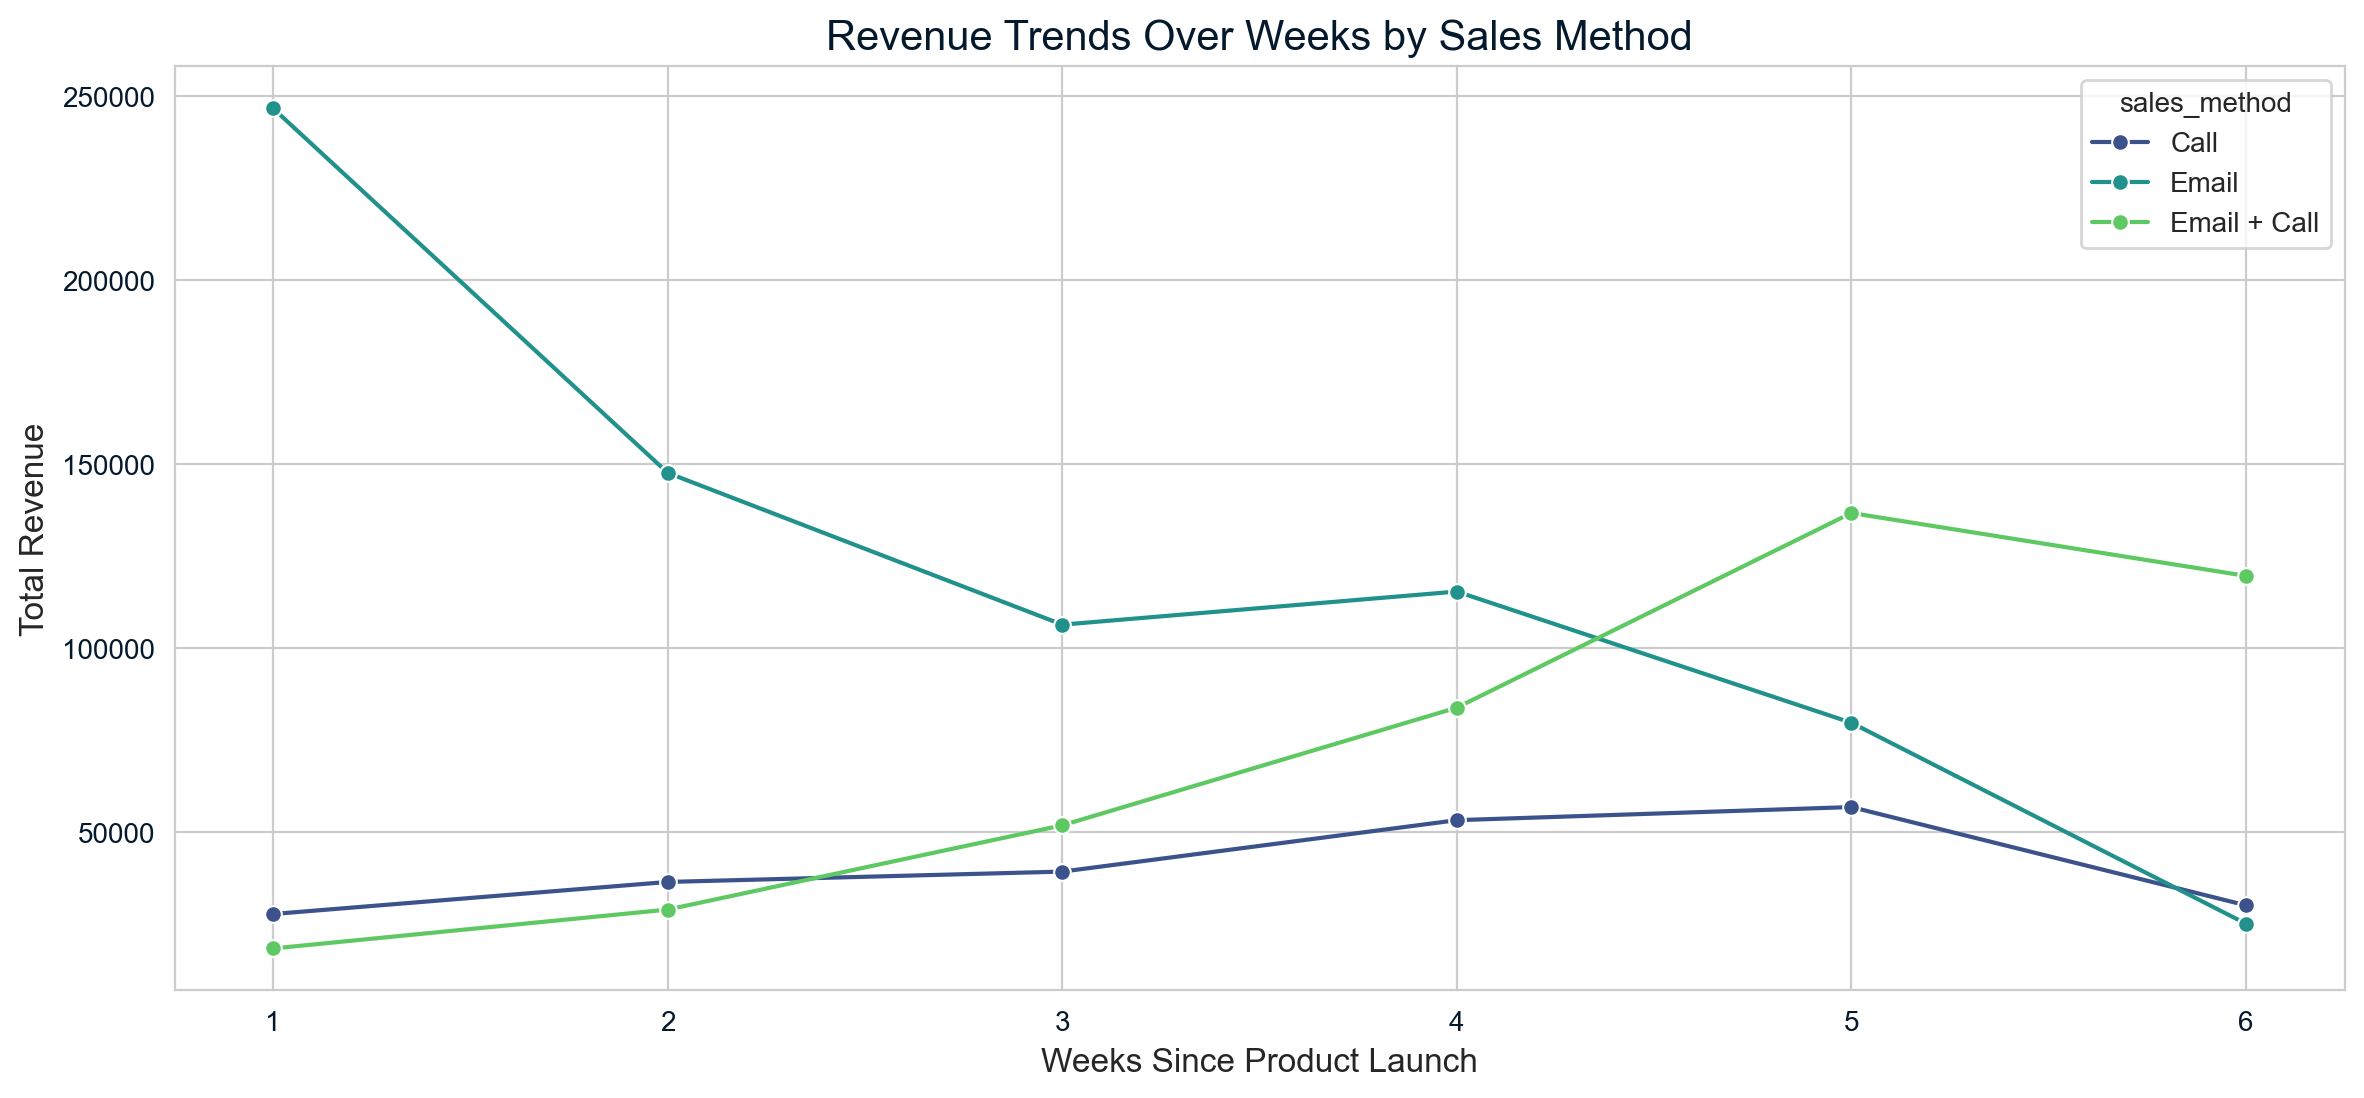

In [38]:
df_grouped = df.groupby(["week", "sales_method"])["revenue"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped, x="week", y="revenue", hue="sales_method", marker="o", palette="viridis")

plt.title("Revenue Trends Over Weeks by Sales Method", fontsize=15)
plt.xlabel("Weeks Since Product Launch", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

plt.show()

## Key Business Metric to Track
To evaluate the effectiveness of each marketing method while aligning with our primary goal of revenue growth, we recommend tracking:

*Revenue per Customer by Marketing Method:*
This metric helps identify which sales approach generates the highest revenue per customer, allowing us to optimize efforts while maximizing returns.

In [39]:
revenue_per_customer = df.groupby("sales_method").agg(
                        total_revenue=("revenue", "sum"),
                        unique_customers=("customer_id", "nunique")
                        ).reset_index()

revenue_per_customer["revenue_per_customer"] = (revenue_per_customer["total_revenue"] / revenue_per_customer["unique_customers"]).round(2)

In [40]:
revenue_per_customer[['sales_method','revenue_per_customer']]

,sales_method,revenue_per_customer
0,Call,49.13
1,Email,96.57
2,Email + Call,170.88


### **Conclusions & Recommendations**  

#### **Key Conclusions:**  
- **Email + call is the most effective sales method**, generating the highest revenue per customer (**$171 per customer**) and showing increasing traction.  
- **Email-only sales are declining** despite having the highest volume, with a revenue per customer of **$97**.  
- **Call-only sales generate the lowest revenue per customer** (**$50**) and may not be the most efficient use of resources.  
- **Revenue is concentrated in a few key states**, with the top seven contributing **67% of total revenue**.  

#### **Business Metric & Tracking:**  
**Revenue per customer by sales method** will be the key metric to track going forward. This will help measure the effectiveness of each approach and optimize sales efforts.  

#### **Recommendations Going Forward:**  
- Expand the email + call approach for high-value customers to maximize revenue.  
- Refine email-only campaigns by optimizing content, timing, and personalization.  
- Focus on top-performing states with targeted marketing efforts to drive higher returns.  
- Reduce reliance on call-only sales, as they yield the lowest revenue per customer.  
- Continuously monitor revenue per customer trends to refine sales strategies based on performance insights.  
